### Importing modules

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import requests
import csv
import json
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim 
from geopy.exc import GeocoderTimedOut
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt
import seaborn as sns
print('Libraries imported.')

Libraries imported.


In [2]:
melbourne_suburbs = pd.read_csv('melbourne_suburbs.csv')
melbourne_suburbs=melbourne_suburbs.fillna(0)
melbourne_suburbs.reset_index(inplace=True)
melbourne_suburbs.drop(['index'],inplace=True,axis=1)
print("Melbourne Subrubs:")
(melbourne_suburbs)

Melbourne Subrubs:


Suburb   Latitude   Longitude
0      Abbotsford, Victoria -37.800278  145.000000
1      Aberfeldie, Victoria -37.751111  144.900000
2         Aintree, Victoria -37.716667  144.666667
3    Airport West, Victoria -37.717222  144.867778
4       Albanvale, Victoria -37.734444  144.751389
..                      ...        ...         ...
381       Windsor, Victoria -37.850278  144.983611
382       Wollert, Victoria -37.584444  145.018056
383            Wyndham Vale -37.883889  144.617778
384     Yallambie, Victoria -37.717500  145.100278
385    Yarraville, Victoria -37.816667  144.883889

[386 rows x 3 columns]

In [3]:
sydney_suburbs = pd.read_csv('sydney_suburbs.csv')
sydney_suburbs.dropna(inplace=True)
sydney_suburbs.reset_index(inplace=True)
sydney_suburbs.drop(['index'],inplace=True,axis=1)
print("Sydney Suburbs:")
(sydney_suburbs)

Sydney Suburbs:


Suburb   Latitude   Longitude
0          Abbotsbury -33.869285  150.866703
1          Abbotsford -33.850553  151.129759
2      Acacia Gardens -33.732459  150.912532
3         Agnes Banks -33.614508  150.711448
4               Airds -34.090000  150.826111
..                ...        ...         ...
673           Yennora -33.862008  150.968610
674         Yowie Bay -34.050278  151.103333
675           Zetland -33.907662  151.208218
676    Jordan Springs -33.725022  150.727127
677   South Granville -33.857778  151.010556

[678 rows x 3 columns]

In [4]:
melbourne_stations=pd.read_csv("melbourne_stations.csv")
melbourne_stations.dropna(inplace=True)
melbourne_stations.reset_index(inplace=True)
melbourne_stations.drop(['index'],inplace=True,axis=1)
print("Melbourne Train Stations:")
melbourne_stations

Melbourne Train Stations:


Station   Latitude   Longitude
0        Southern Cross -37.818333  144.952500
1              Aircraft -37.866667  144.760833
2               Alamein -37.868333  145.079722
3                Albion -37.777222  144.824444
4            Alphington -37.778333  145.031389
..                  ...        ...         ...
215  Williamstown Beach -37.864167  144.894444
216            Willison -37.835833  145.070278
217             Windsor -37.856111  144.991944
218            Yarraman -37.978056  145.191389
219          Yarraville -37.816389  144.889722

[220 rows x 3 columns]

In [5]:
sydney_stations=pd.read_csv("sydney_stations.csv")
sydney_stations.dropna(inplace=True)
sydney_stations.reset_index(inplace=True)
sydney_stations.drop(['index'],inplace=True,axis=1)
print("Sydney Train Stations:")
sydney_stations

Sydney Train Stations:


Station   Latitude   Longitude
0    Mount Kuring-gai Railway Station -33.653064  151.136886
1           Ingleburn Railway Station -33.998333  150.851111
2             Yennora Railway Station -33.862008  150.968610
3              Epping Railway Station -33.772863  151.082090
4          Rooty Hill Railway Station -33.768865  150.841180
..                                ...        ...         ...
163          Mulgrave Railway Station -33.627219  150.831660
164           Croydon Railway Station -33.877794  151.115650
165         Punchbowl Railway Station -33.928717  151.052259
166            Mascot Railway Station -33.928956  151.195178
167       Summer Hill Railway Station -33.893395  151.136873

[168 rows x 3 columns]

In [6]:
#Obtain the latitude and longitude of Sydney
address = 'Melbourne, Australia'
try:
    geolocator = Nominatim(user_agent="Melbourne_explorer")
    location = geolocator.geocode(address)
    latitude_mel = location.latitude
    longitude_mel = location.longitude
except:
    latitude_mel = -37.8142176
    longitude_mel = 144.9631608
print('The geograpical coordinate of Melbourne are {}, {}.'.format(latitude_mel, longitude_mel))

The geograpical coordinate of Melbourne are -37.8142176, 144.9631608.


###### Visualization of the two data sets obtained above by plotting them on a map.

In [7]:
map_melbourne = folium.Map(location=[latitude_mel, longitude_mel], zoom_start=8.5)

for lat, lng, suburb in zip(melbourne_suburbs['Latitude'], melbourne_suburbs['Longitude'], melbourne_suburbs['Suburb']):
    label = '{}'.format(suburb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],
        radius=3,
        popup=label,
        color='#1E90FF',
        fill=True,
        fill_color='#00BFFF',
        fill_opacity=0.8,
        parse_html=False).add_to(map_melbourne)  

for lat, lng, station in zip(melbourne_stations['Latitude'], melbourne_stations['Longitude'], melbourne_stations['Station']):
    label = '{}'.format(station)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],
        radius=4,
        popup=label,
        color='#008000',
        fill=True,
        fill_color='#3CB371	',
        fill_opacity=0.8,
        parse_html=False).add_to(map_melbourne)  
legend_html =   '''
                <div style="position: absolute; 
                            bottom: 50px; left: 50px; width: 170px; height: 50px; 
                            border:2px solid grey; z-index:9999; font-size:18px;font-weight:500%;
                            ">
                              &nbsp; Train Network &nbsp; <i class="fa fa-circle fa-x" style="color:#3CB371"></i><br>
                              &nbsp; Suburbs       &nbsp; <i class="fa fa-circle fa-x" style="color:#1E90FF"></i>
                </div>
                '''     
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Melbourne Suburb visualization wrt  train network</b></h3>
             '''
map_melbourne.get_root().html.add_child(folium.Element(title_html))
map_melbourne.get_root().html.add_child(folium.Element(legend_html))    
map_melbourne

In [8]:
#Obtain the latitude and longitude of Sydney
address = 'Sydney, Australia'
latitude_syd= -33.8548157
longitude_syd= 151.2164539
# location_syd = geolocator.geocode(address)
print('The geograpical coordinate of Sydney are {}, {}.'.format(latitude_syd, longitude_syd))

The geograpical coordinate of Sydney are -33.8548157, 151.2164539.


In [9]:
map_sydney = folium.Map(location=[latitude_syd,longitude_syd], zoom_start=9)

for lat, lng, suburb in zip(sydney_suburbs['Latitude'], sydney_suburbs['Longitude'], sydney_suburbs['Suburb']):
    label = '{}'.format(suburb )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],
        radius=3,
        popup=label,
        color='#1E90FF',
        fill=True,
        fill_color='#00BFFF',
        fill_opacity=0.8,
        parse_html=False).add_to(map_sydney)  

for lat, lng, station in zip(sydney_stations['Latitude'], sydney_stations['Longitude'], sydney_stations['Station']):
    label = '{}'.format(station)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],
        radius=5,
        popup=label,
        color='#008000',
        fill=True,
        fill_color='#3CB371	',
        fill_opacity=0.8,
        parse_html=False).add_to(map_sydney)  
legend_html =   '''
                <div style="position: absolute; 
                            bottom: 50px; left: 50px; width: 170px; height: 50px; 
                            border:2px solid grey; z-index:9999; font-size:18px;font-weight:500%;
                            ">
                              &nbsp; Train Network &nbsp; <i class="fa fa-circle fa-x" style="color:#3CB371"></i><br>
                              &nbsp; Suburbs       &nbsp; <i class="fa fa-circle fa-x" style="color:#1E90FF"></i>
                </div>
                '''  
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Sydney Suburb visualization wrt  train network</b></h3>
             '''
map_sydney.get_root().html.add_child(folium.Element(title_html))

map_sydney.get_root().html.add_child(folium.Element(legend_html))      
map_sydney

<h1>1. Finding Nearest Railway Station</h1>

In [10]:
from geopy.distance import great_circle
a=len(melbourne_suburbs)
nearest_station=[None] * a
distance= [None] * a

for i in range(a):
    if (melbourne_suburbs['Latitude'][i]!=0):
        suburb_coor=(melbourne_suburbs['Latitude'][i],melbourne_suburbs['Longitude'][i])
        dist=float('inf')
        for j in range(len(melbourne_stations)):
            station_coor=(melbourne_stations['Latitude'][j],melbourne_stations['Longitude'][j])
            temp=great_circle(suburb_coor,station_coor).km
            if(temp<dist):
                dist = temp
                distance[i] = temp
                nearest_station[i]=melbourne_stations['Station'][j]
    else:
        nearest_station[i]=np.nan
        distance[i]=np.nan

In [11]:
melbourne_suburbs_station=pd.DataFrame(melbourne_suburbs[['Suburb','Latitude','Longitude']])
melbourne_suburbs_station.insert(1,'Nearest Train Station',nearest_station)
melbourne_suburbs_station.insert(2,'Distance(km)',distance)
melbourne_suburbs_station.dropna(inplace=True)
melbourne_suburbs_station.reset_index(drop=True, inplace=True)
print("Nearest Train Station and distance_Melbourne Suburbs:")
melbourne_suburbs_station

Nearest Train Station and distance_Melbourne Suburbs:


Suburb Nearest Train Station  Distance(km)   Latitude  \
0      Abbotsford, Victoria         Victoria Park      0.503514 -37.800278   
1      Aberfeldie, Victoria              Essendon      1.521641 -37.751111   
2         Aintree, Victoria          Watergardens      9.595217 -37.716667   
3    Airport West, Victoria               Glenroy      4.566174 -37.717222   
4       Albanvale, Victoria         Keilor Plains      3.778670 -37.734444   
..                      ...                   ...           ...        ...   
376       Windsor, Victoria               Prahran      0.568560 -37.850278   
377       Wollert, Victoria           Craigieburn      6.915282 -37.584444   
378            Wyndham Vale              Werribee      4.177509 -37.883889   
379     Yallambie, Victoria              Watsonia      1.607158 -37.717500   
380    Yarraville, Victoria            Yarraville      0.513339 -37.816667   

      Longitude  
0    145.000000  
1    144.900000  
2    144.666667  
3    144.867778  
4    144.751389  
..          ...  
376  144.983611  
377  145.018056  
378  144.617778  
379  145.100278  
380  144.883889  

[381 rows x 5 columns]

In [12]:
from geopy.distance import great_circle
a=len(sydney_suburbs)
nearest_station=[None] * a
distance= [None] * a

for i in range(a):
    if (sydney_suburbs['Latitude'][i]!=0):
        suburb_coor=(sydney_suburbs['Latitude'][i],sydney_suburbs['Longitude'][i])
        dist=float('inf')
        for j in range(len(sydney_stations)):
            station_coor=(sydney_stations['Latitude'][j],sydney_stations['Longitude'][j])
            temp=great_circle(suburb_coor,station_coor).km
            if(temp<dist):
                dist = temp
                distance[i] = temp
                nearest_station[i]=sydney_stations['Station'][j]
    else:
        nearest_station[i]=np.nan
        distance[i]=np.nan

In [13]:
sydney_suburbs_station=pd.DataFrame(sydney_suburbs[['Suburb','Latitude','Longitude']])
sydney_suburbs_station.insert(1,'Nearest Train Station',nearest_station)
sydney_suburbs_station.insert(2,'Distance(km)',distance)
sydney_suburbs_station.dropna(inplace=True)
sydney_suburbs_station.reset_index(drop=True, inplace=True)
print("Nearest Train Station and distance_Sydney Suburbs:")
sydney_suburbs_station

Nearest Train Station and distance_Sydney Suburbs:


Suburb          Nearest Train Station  Distance(km)   Latitude  \
0          Abbotsbury     Cabramatta Railway Station      7.037974 -33.869285   
1          Abbotsford        Croydon Railway Station      3.297269 -33.850553   
2      Acacia Gardens       Marayong Railway Station      2.659913 -33.732459   
3         Agnes Banks  East Richmond Railway Station      4.176875 -33.614508   
4               Airds   Campbelltown Railway Station      2.968845 -34.090000   
..                ...                            ...           ...        ...   
673           Yennora        Yennora Railway Station      0.000000 -33.862008   
674         Yowie Bay        Miranda Railway Station      1.861123 -34.050278   
675           Zetland   Green Square Railway Station      0.557877 -33.907662   
676    Jordan Springs      Kingswood Railway Station      4.077977 -33.725022   
677   South Granville         Auburn Railway Station      1.431341 -33.857778   

      Longitude  
0    150.866703  
1    151.129759  
2    150.912532  
3    150.711448  
4    150.826111  
..          ...  
673  150.968610  
674  151.103333  
675  151.208218  
676  150.727127  
677  151.010556  

[678 rows x 5 columns]

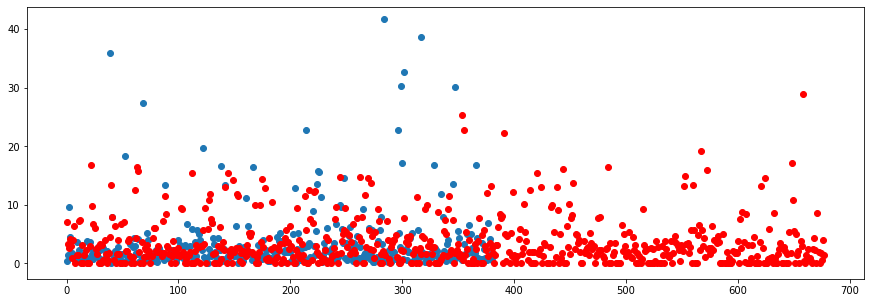

In [14]:
plt.figure(figsize=(15, 5))

plt.scatter(melbourne_suburbs_station['Distance(km)'].index,melbourne_suburbs_station['Distance(km)'])
plt.scatter(sydney_suburbs_station['Distance(km)'].index,sydney_suburbs_station['Distance(km)'],color='red')

### Clustering the Suburb to station distance_Melbourne

In [15]:
clustering = pd.DataFrame(columns=['Distance(km)'])
clustering['Distance(km)'] = melbourne_suburbs_station['Distance(km)']
kmeans = KMeans(n_clusters=5, random_state=0).fit(clustering)
clusters = kmeans.labels_

In [16]:
### Clustering the Suburb to station distance_Melbournemelbourne_suburbs_station.insert(loc=3,column="Cluster_Labels_Dist",value=clusters) 
melbourne_suburbs_station.insert(loc=3,column="Cluster_Labels_Dist",value=clusters) 
melbourne_suburbs_station

Suburb Nearest Train Station  Distance(km)  \
0      Abbotsford, Victoria         Victoria Park      0.503514   
1      Aberfeldie, Victoria              Essendon      1.521641   
2         Aintree, Victoria          Watergardens      9.595217   
3    Airport West, Victoria               Glenroy      4.566174   
4       Albanvale, Victoria         Keilor Plains      3.778670   
..                      ...                   ...           ...   
376       Windsor, Victoria               Prahran      0.568560   
377       Wollert, Victoria           Craigieburn      6.915282   
378            Wyndham Vale              Werribee      4.177509   
379     Yallambie, Victoria              Watsonia      1.607158   
380    Yarraville, Victoria            Yarraville      0.513339   

     Cluster_Labels_Dist   Latitude   Longitude  
0                      3 -37.800278  145.000000  
1                      3 -37.751111  144.900000  
2                      4 -37.716667  144.666667  
3                      0 -37.717222  144.867778  
4                      0 -37.734444  144.751389  
..                   ...        ...         ...  
376                    3 -37.850278  144.983611  
377                    4 -37.584444  145.018056  
378                    0 -37.883889  144.617778  
379                    3 -37.717500  145.100278  
380                    3 -37.816667  144.883889  

[381 rows x 6 columns]

### Clustering the Suburb to station distance_Sydney

In [17]:
clustering = pd.DataFrame(columns=['Distance(km)'])
clustering['Distance(km)'] = sydney_suburbs_station['Distance(km)']
kmeans = KMeans(n_clusters=5, random_state=0).fit(clustering)
clusters = kmeans.labels_

In [18]:
sydney_suburbs_station.insert(loc=3,column="Cluster_Labels_Dist",value=clusters) 
sydney_suburbs_station

Suburb          Nearest Train Station  Distance(km)  \
0          Abbotsbury     Cabramatta Railway Station      7.037974   
1          Abbotsford        Croydon Railway Station      3.297269   
2      Acacia Gardens       Marayong Railway Station      2.659913   
3         Agnes Banks  East Richmond Railway Station      4.176875   
4               Airds   Campbelltown Railway Station      2.968845   
..                ...                            ...           ...   
673           Yennora        Yennora Railway Station      0.000000   
674         Yowie Bay        Miranda Railway Station      1.861123   
675           Zetland   Green Square Railway Station      0.557877   
676    Jordan Springs      Kingswood Railway Station      4.077977   
677   South Granville         Auburn Railway Station      1.431341   

     Cluster_Labels_Dist   Latitude   Longitude  
0                      2 -33.869285  150.866703  
1                      3 -33.850553  151.129759  
2                      3 -33.732459  150.912532  
3                      3 -33.614508  150.711448  
4                      3 -34.090000  150.826111  
..                   ...        ...         ...  
673                    0 -33.862008  150.968610  
674                    0 -34.050278  151.103333  
675                    0 -33.907662  151.208218  
676                    3 -33.725022  150.727127  
677                    0 -33.857778  151.010556  

[678 rows x 6 columns]

### Analysis

#### Melbourne

In [19]:
melbourne_suburbs_station['Distance(km)'].describe()

count    381.000000
mean       3.437843
std        5.542316
min        0.024374
25%        0.919056
50%        1.703369
75%        3.412404
max       41.665202
Name: Distance(km), dtype: float64

In [20]:
melbourne_suburbs_station['Cluster_Labels_Dist'].value_counts()

3    215
0    104
4     36
2     19
1      7
Name: Cluster_Labels_Dist, dtype: int64

#### Sydney

In [21]:
sydney_suburbs_station['Distance(km)'].describe()

count    678.000000
mean       3.460565
std        4.065808
min        0.000000
25%        0.711090
50%        2.263288
75%        4.427397
max       28.870429
Name: Distance(km), dtype: float64

In [22]:
sydney_suburbs_station['Cluster_Labels_Dist'].value_counts()

0    314
3    232
2     82
1     45
4      5
Name: Cluster_Labels_Dist, dtype: int64

## Seperating the Clusters 

#### Melbourne

In [23]:
cluster_0_dist_mel = pd.DataFrame()
cluster_0_dist_mel = melbourne_suburbs_station.loc[(melbourne_suburbs_station['Cluster_Labels_Dist'] == 0)]
describe_0_dist_mel = cluster_0_dist_mel['Distance(km)'].describe()

In [24]:
cluster_1_dist_mel = pd.DataFrame()
cluster_1_dist_mel = melbourne_suburbs_station.loc[(melbourne_suburbs_station['Cluster_Labels_Dist'] == 1)]
describe_1_dist_mel = cluster_1_dist_mel['Distance(km)'].describe()

In [25]:
cluster_2_dist_mel = pd.DataFrame()
cluster_2_dist_mel = melbourne_suburbs_station.loc[(melbourne_suburbs_station['Cluster_Labels_Dist'] == 2)]
describe_2_dist_mel = cluster_2_dist_mel['Distance(km)'].describe()

In [26]:
cluster_3_dist_mel = pd.DataFrame()
cluster_3_dist_mel = melbourne_suburbs_station.loc[(melbourne_suburbs_station['Cluster_Labels_Dist'] == 3)]
describe_3_dist_mel = cluster_3_dist_mel['Distance(km)'].describe()

In [27]:
cluster_4_dist_mel = pd.DataFrame()
cluster_4_dist_mel = melbourne_suburbs_station.loc[(melbourne_suburbs_station['Cluster_Labels_Dist'] == 4)]
describe_4_dist_mel = cluster_4_dist_mel['Distance(km)'].describe()

#### Sydney

In [28]:
cluster_0_dist_syd = pd.DataFrame()
cluster_0_dist_syd = sydney_suburbs_station.loc[(sydney_suburbs_station['Cluster_Labels_Dist'] == 0)]
describe_0_dist_syd = cluster_0_dist_syd['Distance(km)'].describe()

In [29]:
cluster_1_dist_syd = pd.DataFrame()
cluster_1_dist_syd = sydney_suburbs_station.loc[(sydney_suburbs_station['Cluster_Labels_Dist'] == 1)]
describe_1_dist_syd = cluster_1_dist_syd['Distance(km)'].describe()

In [30]:
cluster_2_dist_syd = pd.DataFrame()
cluster_2_dist_syd = sydney_suburbs_station.loc[(sydney_suburbs_station['Cluster_Labels_Dist'] == 2)]
describe_2_dist_syd = cluster_2_dist_syd['Distance(km)'].describe()

In [31]:
cluster_3_dist_syd = pd.DataFrame()
cluster_3_dist_syd = sydney_suburbs_station.loc[(sydney_suburbs_station['Cluster_Labels_Dist'] == 3)]
describe_3_dist_syd = cluster_3_dist_syd['Distance(km)'].describe()

In [32]:
cluster_4_dist_syd = pd.DataFrame()
cluster_4_dist_syd = sydney_suburbs_station.loc[(sydney_suburbs_station['Cluster_Labels_Dist'] == 4)]
describe_4_dist_syd = cluster_4_dist_syd['Distance(km)'].describe()

## Count and Mean of each cluster

#### Melbourne

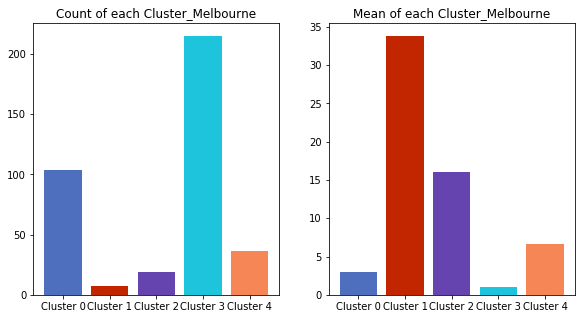

In [33]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.bar(['Cluster 0', 'Cluster 1','Cluster 2','Cluster 3','Cluster 4'],
        [describe_0_dist_mel.iloc[0],describe_1_dist_mel.iloc[0],describe_2_dist_mel.iloc[0],describe_3_dist_mel.iloc[0],describe_4_dist_mel.iloc[0]],color=('#4d6fbe','#C12600','#6644af','#1ec4dc','#F68656'))
plt.title('Count of each Cluster_Melbourne')
plt.subplot(132)
plt.bar(['Cluster 0', 'Cluster 1','Cluster 2','Cluster 3','Cluster 4'], 
        [describe_0_dist_mel.iloc[1],describe_1_dist_mel.iloc[1],describe_2_dist_mel.iloc[1],describe_3_dist_mel.iloc[1],describe_4_dist_mel.iloc[1]],color=('#4d6fbe','#C12600','#6644af','#1ec4dc','#F68656'))
plt.title('Mean of each Cluster_Melbourne')
plt.show()

#### Sydney

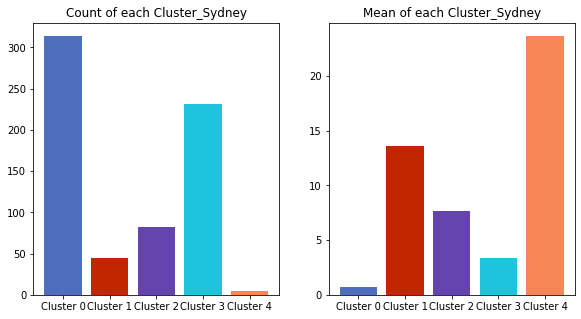

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.bar(['Cluster 0', 'Cluster 1','Cluster 2','Cluster 3','Cluster 4'],
        [describe_0_dist_syd.iloc[0],describe_1_dist_syd.iloc[0],describe_2_dist_syd.iloc[0],describe_3_dist_syd.iloc[0],describe_4_dist_syd.iloc[0]],color=('#4d6fbe','#C12600','#6644af','#1ec4dc','#F68656'))
plt.title('Count of each Cluster_Sydney')
plt.subplot(132)
plt.bar(['Cluster 0', 'Cluster 1','Cluster 2','Cluster 3','Cluster 4'], 
        [describe_0_dist_syd.iloc[1],describe_1_dist_syd.iloc[1],describe_2_dist_syd.iloc[1],describe_3_dist_syd.iloc[1],describe_4_dist_syd.iloc[1]],color=('#4d6fbe','#C12600','#6644af','#1ec4dc','#F68656'))
plt.title('Mean of each Cluster_Sydney')
plt.show()

### Spread of each cluster W.R.T the Train network

#### Melbourne

In [35]:
# create map
map_clusters = folium.Map(location=[latitude_mel, longitude_mel], zoom_start=8)

rainbow = ['#4d6fbe','#C12600','#6644af','#1ec4dc','#F68656']

for lat, lon, suburb, cluster in zip(cluster_0_dist_mel['Latitude'],
                                     cluster_0_dist_mel['Longitude'], 
                                     cluster_0_dist_mel['Suburb'],
                                     cluster_0_dist_mel['Cluster_Labels_Dist']):
    label = folium.Popup(suburb + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[0],
        fill=True,
        fill_color=rainbow[0],
        fill_opacity=1).add_to(map_clusters)

for lat, lon, suburb, cluster in zip(cluster_1_dist_mel['Latitude'], 
                                     cluster_1_dist_mel['Longitude'],
                                     cluster_1_dist_mel['Suburb'],
                                     cluster_1_dist_mel['Cluster_Labels_Dist']):
    label = folium.Popup(suburb + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[1],
        fill=True,
        fill_color=rainbow[1],
        fill_opacity=1).add_to(map_clusters)
           
for lat, lon, suburb, cluster in zip(cluster_2_dist_mel['Latitude'], 
                                     cluster_2_dist_mel['Longitude'],
                                     cluster_2_dist_mel['Suburb'],
                                     cluster_2_dist_mel['Cluster_Labels_Dist']):
    label = folium.Popup(suburb + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[2],
        fill=True,
        fill_color=rainbow[2],
        fill_opacity=1).add_to(map_clusters)
           
for lat, lon, suburb, cluster in zip(cluster_3_dist_mel['Latitude'], 
                                     cluster_3_dist_mel['Longitude'], 
                                     cluster_3_dist_mel['Suburb'],
                                     cluster_3_dist_mel['Cluster_Labels_Dist']):
    label = folium.Popup(suburb + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[3],
        fill=True,
        fill_color=rainbow[3],
        legend='Cluster 3',
        fill_opacity=1).add_to(map_clusters)
       
for lat, lon, suburb, cluster in zip(cluster_4_dist_mel['Latitude'], 
                                     cluster_4_dist_mel['Longitude'], 
                                     cluster_4_dist_mel['Suburb'],
                                     cluster_4_dist_mel['Cluster_Labels_Dist']):
    label = folium.Popup(suburb + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[4],
        fill=True,
        fill_color=rainbow[4],
        fill_opacity=1).add_to(map_clusters)
    
for lat, lng, station in zip(melbourne_stations['Latitude'], 
                             melbourne_stations['Longitude'], 
                             melbourne_stations['Station']):
    label = '{}'.format(station)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],
        radius=3,
        popup=label,
        color='#008000',
        fill=True,
        fill_color='#3CB371	',
        fill_opacity=1,
        parse_html=False).add_to(map_clusters)  
legend_html =   '''
                <div style="position: absolute; 
                            bottom: 50px; left: 50px; width: 170px; height: 160px; 
                            border:2px solid grey; z-index:9999; font-size:18px;font-weight:500%
                            ">
                              &nbsp; Train Network &nbsp; <i class="fa fa-circle fa-x" style="color:#3CB371"></i><br>
                              &nbsp; cluster 0_dist     &nbsp; <i class="fa fa-circle fa-x" style="color:#4d6fbe"></i><br>
                              &nbsp; cluster 1_dist     &nbsp; <i class="fa fa-circle fa-x" style="color:#C12600"></i><br>
                              &nbsp; cluster 2_dist     &nbsp; <i class="fa fa-circle fa-x" style="color:#6644af"></i><br>
                              &nbsp; cluster 3_dist     &nbsp; <i class="fa fa-circle fa-x" style="color:#1ec4dc"></i><br>
                              &nbsp; cluster 4_dist     &nbsp; <i class="fa fa-circle fa-x" style="color:#F68656"></i>
                </div>
                '''    
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Melbourne Clusters visualization</b></h3>
             '''
map_clusters.get_root().html.add_child(folium.Element(title_html))

map_clusters.get_root().html.add_child(folium.Element(legend_html))
map_clusters

#### Sydney

In [36]:
# create map
map_clusters = folium.Map(location=[latitude_syd, longitude_syd], zoom_start=8.5)

rainbow = ['#4d6fbe','#C12600','#6644af','#1ec4dc','#F68656']

for lat, lon, suburb, cluster in zip(cluster_0_dist_syd['Latitude'],
                                     cluster_0_dist_syd['Longitude'], 
                                     cluster_0_dist_syd['Suburb'],
                                     cluster_0_dist_syd['Cluster_Labels_Dist']):
    label = folium.Popup(suburb + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[0],
        fill=True,
        fill_color=rainbow[0],
        fill_opacity=1).add_to(map_clusters)

for lat, lon, suburb, cluster in zip(cluster_1_dist_syd['Latitude'], 
                                     cluster_1_dist_syd['Longitude'],
                                     cluster_1_dist_syd['Suburb'],
                                     cluster_1_dist_syd['Cluster_Labels_Dist']):
    label = folium.Popup(suburb + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[1],
        fill=True,
        fill_color=rainbow[1],
        fill_opacity=1).add_to(map_clusters)
           
for lat, lon, suburb, cluster in zip(cluster_2_dist_syd['Latitude'], 
                                     cluster_2_dist_syd['Longitude'],
                                     cluster_2_dist_syd['Suburb'],
                                     cluster_2_dist_syd['Cluster_Labels_Dist']):
    label = folium.Popup(suburb + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[2],
        fill=True,
        fill_color=rainbow[2],
        fill_opacity=1).add_to(map_clusters)
           
for lat, lon, suburb, cluster in zip(cluster_3_dist_syd['Latitude'], 
                                     cluster_3_dist_syd['Longitude'], 
                                     cluster_3_dist_syd['Suburb'],
                                     cluster_3_dist_syd['Cluster_Labels_Dist']):
    label = folium.Popup(suburb + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[3],
        fill=True,
        fill_color=rainbow[3],
        legend='Cluster 3',
        fill_opacity=1).add_to(map_clusters)
       
for lat, lon, suburb, cluster in zip(cluster_4_dist_syd['Latitude'], 
                                     cluster_4_dist_syd['Longitude'], 
                                     cluster_4_dist_syd['Suburb'],
                                     cluster_4_dist_syd['Cluster_Labels_Dist']):
    label = folium.Popup(suburb + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[4],
        fill=True,
        fill_color=rainbow[4],
        fill_opacity=1).add_to(map_clusters)
    
for lat, lng, station in zip(sydney_stations['Latitude'], 
                             sydney_stations['Longitude'], 
                             sydney_stations['Station']):
    label = '{}'.format(station)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],
        radius=3,
        popup=label,
        color='#008000',
        fill=True,
        fill_color='#3CB371	',
        fill_opacity=1,
        parse_html=False).add_to(map_clusters)  
legend_html =   '''
                <div style="position: absolute; 
                            bottom: 50px; left: 50px; width: 170px; height: 160px; 
                            border:2px solid grey; z-index:9999; font-size:18px;font-weight:500%
                            ">
                              &nbsp; Train Network &nbsp; <i class="fa fa-circle fa-x" style="color:#3CB371"></i><br>
                              &nbsp; cluster 0_dist     &nbsp; <i class="fa fa-circle fa-x" style="color:#4d6fbe"></i><br>
                              &nbsp; cluster 1_dist     &nbsp; <i class="fa fa-circle fa-x" style="color:#C12600"></i><br>
                              &nbsp; cluster 2_dist     &nbsp; <i class="fa fa-circle fa-x" style="color:#6644af"></i><br>
                              &nbsp; cluster 3_dist     &nbsp; <i class="fa fa-circle fa-x" style="color:#1ec4dc"></i><br>
                              &nbsp; cluster 4_dist     &nbsp; <i class="fa fa-circle fa-x" style="color:#F68656"></i>
                </div>
                '''    
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Sydney Clusters visualization</b></h3>
             '''
map_clusters.get_root().html.add_child(folium.Element(title_html))
map_clusters.get_root().html.add_child(folium.Element(legend_html))
map_clusters

### Cluster Summary

#### Melbourne

In [37]:
df_Clusters_dist_mel=pd.DataFrame(cluster_0_dist_mel.describe()['Distance(km)'])
df_Clusters_dist_mel.insert(1,'Cluster 1',cluster_1_dist_mel.describe()['Distance(km)'])
df_Clusters_dist_mel.insert(2,'Cluster 2',cluster_2_dist_mel.describe()['Distance(km)'])
df_Clusters_dist_mel.insert(2,'Cluster 3',cluster_3_dist_mel.describe()['Distance(km)'])
df_Clusters_dist_mel.insert(4,'Cluster 4',cluster_4_dist_mel.describe()['Distance(km)'])
df_Clusters_dist_mel=df_Clusters_dist_mel.rename(columns={'Distance(km)':'Cluster 0'})

#### Sydney

In [38]:
df_Clusters_dist_syd=pd.DataFrame(cluster_0_dist_syd.describe()['Distance(km)'])
df_Clusters_dist_syd.insert(1,'Cluster 1',cluster_1_dist_syd.describe()['Distance(km)'])
df_Clusters_dist_syd.insert(2,'Cluster 2',cluster_2_dist_syd.describe()['Distance(km)'])
df_Clusters_dist_syd.insert(2,'Cluster 3',cluster_3_dist_syd.describe()['Distance(km)'])
df_Clusters_dist_syd.insert(4,'Cluster 4',cluster_4_dist_syd.describe()['Distance(km)'])
df_Clusters_dist_syd=df_Clusters_dist_syd.rename(columns={'Distance(km)':'Cluster 0'})

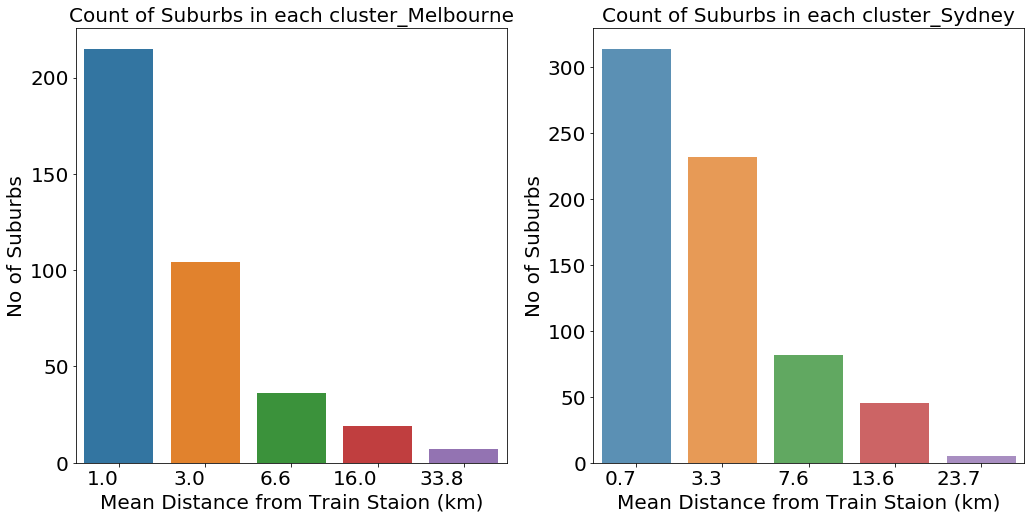

In [39]:
pd.set_option('precision', 2)
np.set_printoptions(precision=2)
df_Clusters_dist_mel[:2]=np.around(df_Clusters_dist_mel[:2],decimals=1)
count = df_Clusters_dist_mel[:2].values
count[0].transpose()
plt.figure(figsize=(17,8))
plt.subplot(121)
plt.title('Count of Suburbs in each cluster_Melbourne',fontsize=20)
sns.barplot(count[1].transpose(), count[0].transpose(), alpha=0.8)
sns.barplot(count[1].transpose(), count[0].transpose(), alpha=0.8)

sns.barplot(count[1].transpose(), count[0].transpose(), alpha=0.8)

plt.xlabel('Mean Distance from Train Staion (km)', fontsize=20)
plt.ylabel('No of Suburbs', fontsize=20)
plt.xticks(
    horizontalalignment='right',
    fontsize=20
)
plt.yticks(
    fontsize=20
)
df_Clusters_dist_syd[:2]=np.around(df_Clusters_dist_syd[:2],decimals=1)
count = df_Clusters_dist_syd[:2].values
count[0].transpose()
plt.subplot(122)
plt.title('Count of Suburbs in each cluster_Sydney',fontsize=20)
sns.barplot(count[1].transpose(), count[0].transpose(), alpha=0.8)
plt.xlabel('Mean Distance from Train Staion (km)', fontsize=20)
plt.ylabel('No of Suburbs', fontsize=20)
plt.xticks(
    horizontalalignment='right',
    fontsize=20
)
plt.yticks(
    fontsize=20
)
plt.show()

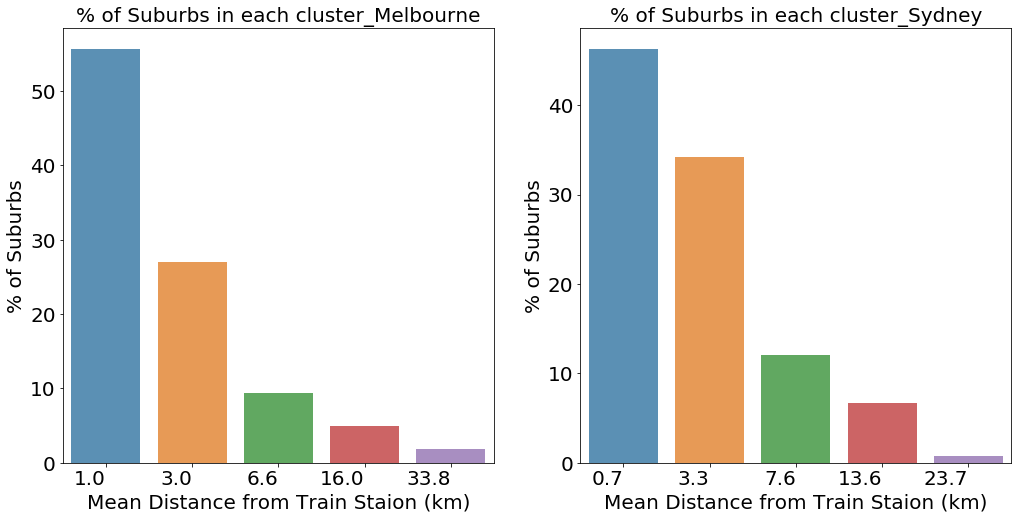

In [40]:
pd.set_option('precision', 2)
np.set_printoptions(precision=2)

df_Clusters_dist_mel=np.around(df_Clusters_dist_mel,decimals=1)
count = df_Clusters_dist_mel.values
count[0].transpose()
plt.figure(figsize=(17,8))

plt.subplot(121)

plt.title('% of Suburbs in each cluster_Melbourne',fontsize=20)
sns.barplot(count[1].transpose(), count[0].transpose()*100/len(melbourne_suburbs), alpha=0.8)

plt.xlabel('Mean Distance from Train Staion (km)', fontsize=20)
plt.ylabel('% of Suburbs', fontsize=20)
plt.xticks(
    horizontalalignment='right',
    fontsize=20
)
plt.yticks(
    fontsize=20
)

plt.subplot(122)
df_Clusters_dist_syd[:2]=np.around(df_Clusters_dist_syd[:2],decimals=1)
count = df_Clusters_dist_syd[:2].values
count[0].transpose()
plt.title('% of Suburbs in each cluster_Sydney',fontsize=20)
sns.barplot(count[1].transpose(), count[0].transpose()*100/len(sydney_suburbs), alpha=0.8)
plt.xlabel('Mean Distance from Train Staion (km)', fontsize=20)
plt.ylabel('% of Suburbs', fontsize=20)
plt.xticks(
    horizontalalignment='right',
    fontsize=20
)
plt.yticks(
    fontsize=20
)
plt.show()

In [41]:
melbourne_suburbs_station_dummies = pd.get_dummies(melbourne_suburbs_station, columns=['Cluster_Labels_Dist'])
melbourne_suburbs_station_dummies

Suburb Nearest Train Station  Distance(km)  Latitude  \
0      Abbotsford, Victoria         Victoria Park          0.50    -37.80   
1      Aberfeldie, Victoria              Essendon          1.52    -37.75   
2         Aintree, Victoria          Watergardens          9.60    -37.72   
3    Airport West, Victoria               Glenroy          4.57    -37.72   
4       Albanvale, Victoria         Keilor Plains          3.78    -37.73   
..                      ...                   ...           ...       ...   
376       Windsor, Victoria               Prahran          0.57    -37.85   
377       Wollert, Victoria           Craigieburn          6.92    -37.58   
378            Wyndham Vale              Werribee          4.18    -37.88   
379     Yallambie, Victoria              Watsonia          1.61    -37.72   
380    Yarraville, Victoria            Yarraville          0.51    -37.82   

     Longitude  Cluster_Labels_Dist_0  Cluster_Labels_Dist_1  \
0       145.00                      0                      0   
1       144.90                      0                      0   
2       144.67                      0                      0   
3       144.87                      1                      0   
4       144.75                      1                      0   
..         ...                    ...                    ...   
376     144.98                      0                      0   
377     145.02                      0                      0   
378     144.62                      1                      0   
379     145.10                      0                      0   
380     144.88                      0                      0   

     Cluster_Labels_Dist_2  Cluster_Labels_Dist_3  Cluster_Labels_Dist_4  
0                        0                      1                      0  
1                        0                      1                      0  
2                        0                      0                      1  
3                        0                      0                      0  
4                        0                      0                      0  
..                     ...                    ...                    ...  
376                      0                      1                      0  
377                      0                      0                      1  
378                      0                      0                      0  
379                      0                      1                      0  
380                      0                      1                      0  

[381 rows x 10 columns]

In [42]:
sydney_suburbs_station_dummies = pd.get_dummies(sydney_suburbs_station, columns=['Cluster_Labels_Dist'])
sydney_suburbs_station_dummies

Suburb          Nearest Train Station  Distance(km)  Latitude  \
0          Abbotsbury     Cabramatta Railway Station          7.04    -33.87   
1          Abbotsford        Croydon Railway Station          3.30    -33.85   
2      Acacia Gardens       Marayong Railway Station          2.66    -33.73   
3         Agnes Banks  East Richmond Railway Station          4.18    -33.61   
4               Airds   Campbelltown Railway Station          2.97    -34.09   
..                ...                            ...           ...       ...   
673           Yennora        Yennora Railway Station          0.00    -33.86   
674         Yowie Bay        Miranda Railway Station          1.86    -34.05   
675           Zetland   Green Square Railway Station          0.56    -33.91   
676    Jordan Springs      Kingswood Railway Station          4.08    -33.73   
677   South Granville         Auburn Railway Station          1.43    -33.86   

     Longitude  Cluster_Labels_Dist_0  Cluster_Labels_Dist_1  \
0       150.87                      0                      0   
1       151.13                      0                      0   
2       150.91                      0                      0   
3       150.71                      0                      0   
4       150.83                      0                      0   
..         ...                    ...                    ...   
673     150.97                      1                      0   
674     151.10                      1                      0   
675     151.21                      1                      0   
676     150.73                      0                      0   
677     151.01                      1                      0   

     Cluster_Labels_Dist_2  Cluster_Labels_Dist_3  Cluster_Labels_Dist_4  
0                        1                      0                      0  
1                        0                      1                      0  
2                        0                      1                      0  
3                        0                      1                      0  
4                        0                      1                      0  
..                     ...                    ...                    ...  
673                      0                      0                      0  
674                      0                      0                      0  
675                      0                      0                      0  
676                      0                      1                      0  
677                      0                      0                      0  

[678 rows x 10 columns]

In [43]:
melbourne_suburbs_station_dummies_dist=melbourne_suburbs_station_dummies.copy()
melbourne_suburbs_station_dummies_dist[['Cluster_Labels_Dist_0']]=melbourne_suburbs_station_dummies_dist[['Cluster_Labels_Dist_0']].astype(float)
melbourne_suburbs_station_dummies_dist[['Cluster_Labels_Dist_1']]=melbourne_suburbs_station_dummies_dist[['Cluster_Labels_Dist_1']].astype(float)
melbourne_suburbs_station_dummies_dist[['Cluster_Labels_Dist_2']]=melbourne_suburbs_station_dummies_dist[['Cluster_Labels_Dist_2']].astype(float)
melbourne_suburbs_station_dummies_dist[['Cluster_Labels_Dist_3']]=melbourne_suburbs_station_dummies_dist[['Cluster_Labels_Dist_3']].astype(float)
melbourne_suburbs_station_dummies_dist[['Cluster_Labels_Dist_4']]=melbourne_suburbs_station_dummies_dist[['Cluster_Labels_Dist_4']].astype(float)
for j in range(len(melbourne_suburbs_station_dummies)):
    if(melbourne_suburbs_station_dummies['Cluster_Labels_Dist_0'][j]==1):    
            melbourne_suburbs_station_dummies_dist['Cluster_Labels_Dist_0'][j]=float(melbourne_suburbs_station_dummies_dist['Distance(km)'][j])
    if(melbourne_suburbs_station_dummies['Cluster_Labels_Dist_1'][j]==1):    
                melbourne_suburbs_station_dummies_dist['Cluster_Labels_Dist_1'][j]=float(melbourne_suburbs_station_dummies_dist['Distance(km)'][j])
    if(melbourne_suburbs_station_dummies['Cluster_Labels_Dist_2'][j]==1):    
                    melbourne_suburbs_station_dummies_dist['Cluster_Labels_Dist_2'][j]=float(melbourne_suburbs_station_dummies_dist['Distance(km)'][j])
    if(melbourne_suburbs_station_dummies['Cluster_Labels_Dist_3'][j]==1):    
                        melbourne_suburbs_station_dummies_dist['Cluster_Labels_Dist_3'][j]=float(melbourne_suburbs_station_dummies_dist['Distance(km)'][j])
    if(melbourne_suburbs_station_dummies['Cluster_Labels_Dist_4'][j]==1):    
                                melbourne_suburbs_station_dummies_dist['Cluster_Labels_Dist_4'][j]=float(melbourne_suburbs_station_dummies_dist['Distance(km)'][j])

In [44]:
sydney_suburbs_station_dummies_dist=sydney_suburbs_station_dummies.copy()
sydney_suburbs_station_dummies_dist[['Cluster_Labels_Dist_0']]=sydney_suburbs_station_dummies_dist[['Cluster_Labels_Dist_0']].astype(float)
sydney_suburbs_station_dummies_dist[['Cluster_Labels_Dist_1']]=sydney_suburbs_station_dummies_dist[['Cluster_Labels_Dist_1']].astype(float)
sydney_suburbs_station_dummies_dist[['Cluster_Labels_Dist_2']]=sydney_suburbs_station_dummies_dist[['Cluster_Labels_Dist_2']].astype(float)
sydney_suburbs_station_dummies_dist[['Cluster_Labels_Dist_3']]=sydney_suburbs_station_dummies_dist[['Cluster_Labels_Dist_3']].astype(float)
sydney_suburbs_station_dummies_dist[['Cluster_Labels_Dist_4']]=sydney_suburbs_station_dummies_dist[['Cluster_Labels_Dist_4']].astype(float)
for j in range(len(sydney_suburbs_station_dummies)):
    if(sydney_suburbs_station_dummies['Cluster_Labels_Dist_0'][j]==1):    
            sydney_suburbs_station_dummies_dist['Cluster_Labels_Dist_0'][j]=float(sydney_suburbs_station_dummies_dist['Distance(km)'][j])
    if(sydney_suburbs_station_dummies['Cluster_Labels_Dist_1'][j]==1):    
                sydney_suburbs_station_dummies_dist['Cluster_Labels_Dist_1'][j]=float(sydney_suburbs_station_dummies_dist['Distance(km)'][j])
    if(sydney_suburbs_station_dummies['Cluster_Labels_Dist_2'][j]==1):    
                    sydney_suburbs_station_dummies_dist['Cluster_Labels_Dist_2'][j]=float(sydney_suburbs_station_dummies_dist['Distance(km)'][j])
    if(sydney_suburbs_station_dummies['Cluster_Labels_Dist_3'][j]==1):    
                        sydney_suburbs_station_dummies_dist['Cluster_Labels_Dist_3'][j]=float(sydney_suburbs_station_dummies_dist['Distance(km)'][j])
    if(sydney_suburbs_station_dummies['Cluster_Labels_Dist_4'][j]==1):    
                                sydney_suburbs_station_dummies_dist['Cluster_Labels_Dist_4'][j]=float(sydney_suburbs_station_dummies_dist['Distance(km)'][j])

In [45]:
melbourne_suburbs_station_dummies_dist=melbourne_suburbs_station_dummies_dist.rename(columns={'Cluster Labels_0':'Distance_Cluster Labels_0(km)',
                                                      'Cluster Labels_1':'Distance_Cluster Labels_1(km)',
                                                      'Cluster Labels_2':'Distance_Cluster Labels_2(km)',
                                                      'Cluster Labels_3':'Distance_Cluster Labels_3(km)',
                                                      'Cluster Labels_4':'Distance_Cluster Labels_4(km)'})
melbourne_suburbs_station_dummies_dist

Suburb Nearest Train Station  Distance(km)  Latitude  \
0      Abbotsford, Victoria         Victoria Park          0.50    -37.80   
1      Aberfeldie, Victoria              Essendon          1.52    -37.75   
2         Aintree, Victoria          Watergardens          9.60    -37.72   
3    Airport West, Victoria               Glenroy          4.57    -37.72   
4       Albanvale, Victoria         Keilor Plains          3.78    -37.73   
..                      ...                   ...           ...       ...   
376       Windsor, Victoria               Prahran          0.57    -37.85   
377       Wollert, Victoria           Craigieburn          6.92    -37.58   
378            Wyndham Vale              Werribee          4.18    -37.88   
379     Yallambie, Victoria              Watsonia          1.61    -37.72   
380    Yarraville, Victoria            Yarraville          0.51    -37.82   

     Longitude  Cluster_Labels_Dist_0  Cluster_Labels_Dist_1  \
0       145.00                   0.00                    0.0   
1       144.90                   0.00                    0.0   
2       144.67                   0.00                    0.0   
3       144.87                   4.57                    0.0   
4       144.75                   3.78                    0.0   
..         ...                    ...                    ...   
376     144.98                   0.00                    0.0   
377     145.02                   0.00                    0.0   
378     144.62                   4.18                    0.0   
379     145.10                   0.00                    0.0   
380     144.88                   0.00                    0.0   

     Cluster_Labels_Dist_2  Cluster_Labels_Dist_3  Cluster_Labels_Dist_4  
0                      0.0                   0.50                   0.00  
1                      0.0                   1.52                   0.00  
2                      0.0                   0.00                   9.60  
3                      0.0                   0.00                   0.00  
4                      0.0                   0.00                   0.00  
..                     ...                    ...                    ...  
376                    0.0                   0.57                   0.00  
377                    0.0                   0.00                   6.92  
378                    0.0                   0.00                   0.00  
379                    0.0                   1.61                   0.00  
380                    0.0                   0.51                   0.00  

[381 rows x 10 columns]

In [46]:
sydney_suburbs_station_dummies_dist=sydney_suburbs_station_dummies_dist.rename(columns={'Cluster Labels_0':'Distance_Cluster Labels_0(km)',
                                                      'Cluster Labels_1':'Distance_Cluster Labels_1(km)',
                                                      'Cluster Labels_2':'Distance_Cluster Labels_2(km)',
                                                      'Cluster Labels_3':'Distance_Cluster Labels_3(km)',
                                                      'Cluster Labels_4':'Distance_Cluster Labels_4(km)'})
sydney_suburbs_station_dummies_dist

Suburb          Nearest Train Station  Distance(km)  Latitude  \
0          Abbotsbury     Cabramatta Railway Station          7.04    -33.87   
1          Abbotsford        Croydon Railway Station          3.30    -33.85   
2      Acacia Gardens       Marayong Railway Station          2.66    -33.73   
3         Agnes Banks  East Richmond Railway Station          4.18    -33.61   
4               Airds   Campbelltown Railway Station          2.97    -34.09   
..                ...                            ...           ...       ...   
673           Yennora        Yennora Railway Station          0.00    -33.86   
674         Yowie Bay        Miranda Railway Station          1.86    -34.05   
675           Zetland   Green Square Railway Station          0.56    -33.91   
676    Jordan Springs      Kingswood Railway Station          4.08    -33.73   
677   South Granville         Auburn Railway Station          1.43    -33.86   

     Longitude  Cluster_Labels_Dist_0  Cluster_Labels_Dist_1  \
0       150.87                   0.00                    0.0   
1       151.13                   0.00                    0.0   
2       150.91                   0.00                    0.0   
3       150.71                   0.00                    0.0   
4       150.83                   0.00                    0.0   
..         ...                    ...                    ...   
673     150.97                   0.00                    0.0   
674     151.10                   1.86                    0.0   
675     151.21                   0.56                    0.0   
676     150.73                   0.00                    0.0   
677     151.01                   1.43                    0.0   

     Cluster_Labels_Dist_2  Cluster_Labels_Dist_3  Cluster_Labels_Dist_4  
0                     7.04                   0.00                    0.0  
1                     0.00                   3.30                    0.0  
2                     0.00                   2.66                    0.0  
3                     0.00                   4.18                    0.0  
4                     0.00                   2.97                    0.0  
..                     ...                    ...                    ...  
673                   0.00                   0.00                    0.0  
674                   0.00                   0.00                    0.0  
675                   0.00                   0.00                    0.0  
676                   0.00                   4.08                    0.0  
677                   0.00                   0.00                    0.0  

[678 rows x 10 columns]

### Storing the Cluster Data

In [47]:
df_Clusters_dist_mel.to_csv(r'melbourne_suburb_distance_cluster_summary.csv', index = True)
melbourne_suburbs_station_dummies.to_csv(r'melbourne_suburb_distance_cluster_classification.csv', index = True)
melbourne_suburbs_station_dummies_dist.to_csv(r'melbourne_suburb_distance_cluster_distance.csv', index = True)

In [48]:
df_Clusters_dist_syd.to_csv(r'sydney_suburb_distance_cluster_summary.csv', index = True)
sydney_suburbs_station_dummies.to_csv(r'sydney_suburb_distance_cluster_classification.csv', index = True)
sydney_suburbs_station_dummies_dist.to_csv(r'sydney_suburb_distance_cluster_distance.csv', index = True)

In [49]:
df_Clusters_dist_mel = df_Clusters_dist_mel.sort_values(by ='max', axis=1)
df_Clusters_dist_mel.columns=['Very Near','Near','Moderate','Far','Very Far']
df_Clusters_dist_mel

Very Near   Near  Moderate   Far  Very Far
count      215.0  104.0      36.0  19.0       7.0
mean         1.0    3.0       6.6  16.0      33.8
std          0.5    0.8       1.6   3.3       5.2
min          0.0    2.0       5.0  11.4      27.3
25%          0.5    2.4       5.5  13.5      30.2
50%          1.0    2.9       6.0  15.7      32.6
75%          1.4    3.7       7.2  17.0      37.3
max          2.0    4.8      11.1  22.8      41.7

In [50]:
df_Clusters_dist_syd = df_Clusters_dist_syd.sort_values(by ='max', axis=1)
df_Clusters_dist_syd.columns=['Very Near','Near','Moderate','Far','Very Far']
df_Clusters_dist_syd

Very Near    Near  Moderate    Far  Very Far
count     314.00  232.00     82.00  45.00      5.00
mean        0.70    3.30      7.60  13.60     23.70
std         0.73    0.94      1.46   1.74      3.62
min         0.00    2.03      5.56  10.82     19.22
25%         0.00    2.54      6.35  12.14     22.19
50%         0.51    3.13      7.64  13.28     22.74
75%         1.42    3.96      8.87  14.82     25.29
max         2.02    5.46     10.43  17.10     28.87

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 <a list of 7 Text yticklabel objects>)

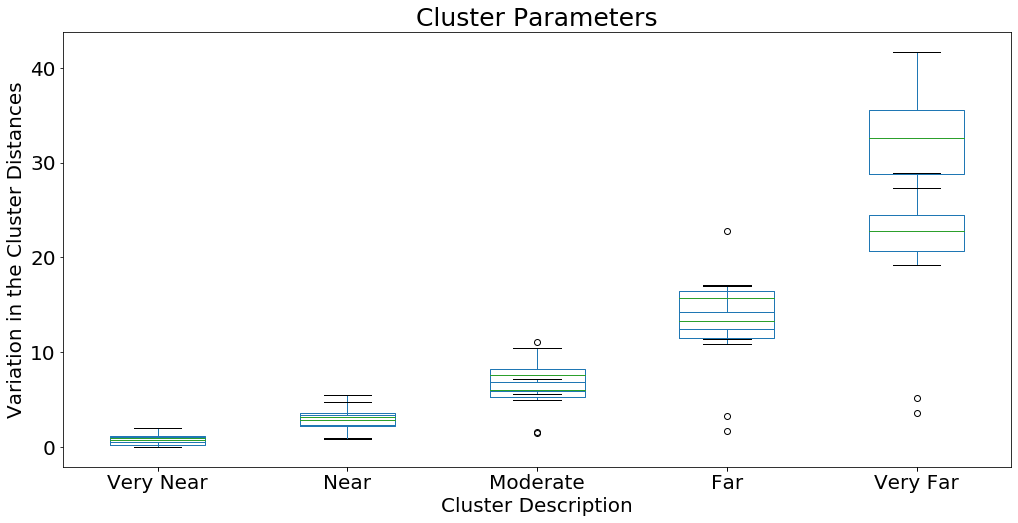

In [51]:
plt.figure(figsize=(17,8))
plt.title('Cluster Parameters',fontsize=25)
df_Clusters_dist_syd[1:].boxplot(grid = False) 
df_Clusters_dist_mel[1:].boxplot(grid = False) 
plt.xlabel('Cluster Description', fontsize=20)
plt.ylabel('Variation in the Cluster Distances', fontsize=20)
plt.xticks(
    fontsize=20
)
plt.yticks(
    fontsize=20
)

In [52]:
print("Summary of the cluster spread in Melbourne:")
df_Clusters_dist_mel

Summary of the cluster spread in Melbourne:


Very Near   Near  Moderate   Far  Very Far
count      215.0  104.0      36.0  19.0       7.0
mean         1.0    3.0       6.6  16.0      33.8
std          0.5    0.8       1.6   3.3       5.2
min          0.0    2.0       5.0  11.4      27.3
25%          0.5    2.4       5.5  13.5      30.2
50%          1.0    2.9       6.0  15.7      32.6
75%          1.4    3.7       7.2  17.0      37.3
max          2.0    4.8      11.1  22.8      41.7

In [53]:
print("Summary of the cluster spread in Sydney:")
df_Clusters_dist_syd

Summary of the cluster spread in Sydney:


Very Near    Near  Moderate    Far  Very Far
count     314.00  232.00     82.00  45.00      5.00
mean        0.70    3.30      7.60  13.60     23.70
std         0.73    0.94      1.46   1.74      3.62
min         0.00    2.03      5.56  10.82     19.22
25%         0.00    2.54      6.35  12.14     22.19
50%         0.51    3.13      7.64  13.28     22.74
75%         1.42    3.96      8.87  14.82     25.29
max         2.02    5.46     10.43  17.10     28.87